In [1]:
import  numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


In [2]:
data = pd.read_csv('guaranteed_stats.csv')

In [3]:
data.tail()

,driver_id,driver,date,interval,interval_id,plan_id,plan,zone,area,area_id,guaranteed,courses,trips
99995,16278,معروف اسحاقی,2021-06-08,ظهر,62,286,طرح حقوقی شهریور 1400,مرکز,فاطمی,9,True,9,8
99996,17001,حسین تقی زاده,2021-06-08,ظهر,62,286,طرح حقوقی شهریور 1400,شمال,نیاوران,24,True,9,5
99997,8170,رضا قزل سفلو,2021-06-08,ظهر,62,286,طرح حقوقی شهریور 1400,غرب,پونک,27,True,9,6
99998,9408,محمدرضا کیانی قمی,2021-06-08,ظهر,62,286,طرح حقوقی شهریور 1400,شمال شرق,ظفر,5,True,9,8
99999,19498,ارژنگ صباحی وند بوری,2021-06-08,شب,65,286,طرح حقوقی شهریور 1400,شمال,ولنجک,21,True,9,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   driver_id    100000 non-null  int64 
 1   driver       100000 non-null  object
 2   date         100000 non-null  object
 3   interval     100000 non-null  object
 4   interval_id  100000 non-null  int64 
 5   plan_id      100000 non-null  int64 
 6   plan         100000 non-null  object
 7   zone         100000 non-null  object
 8   area         100000 non-null  object
 9   area_id      100000 non-null  int64 
 10  guaranteed   100000 non-null  bool  
 11  courses      100000 non-null  int64 
 12  trips        100000 non-null  int64 
dtypes: bool(1), int64(6), object(6)
memory usage: 9.3+ MB


In [26]:
data['date'].min()

'2021-06-08'

In [27]:
data['date'].max()

'2021-09-06'

In [28]:
data['plan_id'].unique()

array([286])

In [29]:
data['driver_id'].nunique()

2947

In [76]:
data['area_id'].nunique()

24

In [48]:
data['guaranteed'].value_counts()

True     84360
False    15640
Name: guaranteed, dtype: int64

In [49]:
guaranteed_per_sad = data.groupby(['date', 'interval_id', 'area_id'])['guaranteed'].sum().reset_index()
guaranteed_per_sad['guaranteed'] = np.where(guaranteed_per_sad['guaranteed']>0 , 1 , 0)
guaranteed_per_sad[guaranteed_per_sad['guaranteed']==1]

,date,interval_id,area_id,guaranteed
0,2021-06-08,61,29,1
1,2021-06-08,62,1,1
2,2021-06-08,62,3,1
3,2021-06-08,62,5,1
4,2021-06-08,62,7,1
...,...,...,...,...
9656,2021-09-06,64,116,1
9657,2021-09-06,64,117,1
9658,2021-09-06,64,119,1
9659,2021-09-06,64,149,1


In [61]:
guaranteed_shift_area_per_day  = guaranteed_per_sad[guaranteed_per_sad['guaranteed']==1]\
                                    .groupby(['date'])['guaranteed'].count()\
                                    .reset_index()

not_guaranteed_shift_area_per_day = guaranteed_per_sad[guaranteed_per_sad['guaranteed']==False]\
                                    .groupby(['date'])['guaranteed'].count()\
                                    .reset_index().rename({'guaranteed' : 'not_guaranteed'}, axis=1)

guaranteed_shift_area_per_day = guaranteed_shift_area_per_day.merge(not_guaranteed_shift_area_per_day,
                                                                    on=['date'], how='left')

guaranteed_shift_area_per_day.fillna(0, inplace=True)

In [62]:
guaranteed_shift_area_per_day

,date,guaranteed,not_guaranteed
0,2021-06-08,30,0.0
1,2021-06-09,111,0.0
2,2021-06-10,111,0.0
3,2021-06-11,106,0.0
4,2021-06-12,110,0.0
...,...,...,...
86,2021-09-02,99,10.0
87,2021-09-03,97,10.0
88,2021-09-04,94,11.0
89,2021-09-05,99,11.0


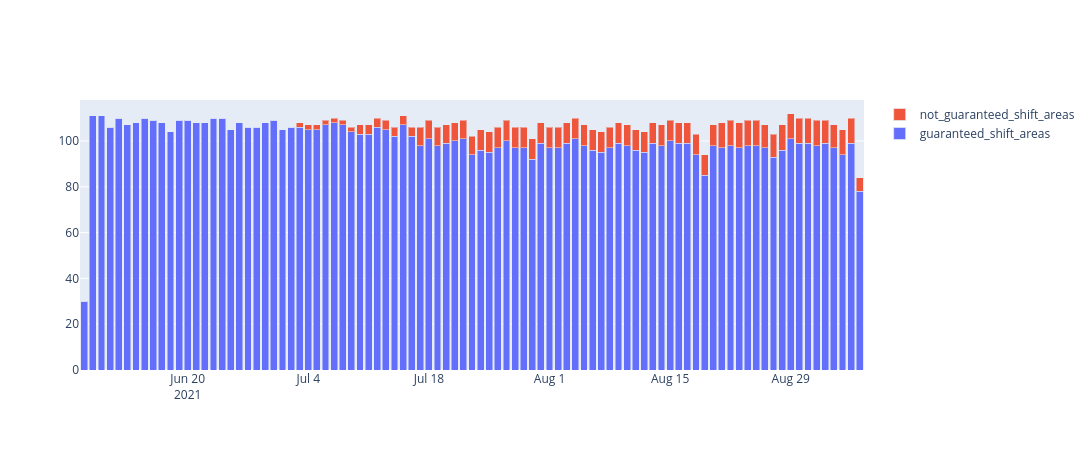

In [73]:
fig = go.Figure(data=[
    go.Bar(x=guaranteed_shift_area_per_day['date'], y=guaranteed_shift_area_per_day['guaranteed'], name='guaranteed_shift_areas'),
    go.Bar(x=guaranteed_shift_area_per_day['date'], y=guaranteed_shift_area_per_day['not_guaranteed'], name='not_guaranteed_shift_areas')
])
fig.update_layout(barmode='stack')
fig.show()

In [97]:
per_area = data[data['guaranteed']==1].groupby(['area_id', 'interval_id'])['guaranteed'].count().reset_index()
areas = data[['area_id', 'area']].drop_duplicates(['area_id', 'area'])
intervals = data[['interval_id', 'interval']].drop_duplicates(['interval_id', 'interval'])
per_area = per_area.merge(areas, on='area_id', how='left')
per_area = per_area.merge(intervals, on='interval_id', how='left')

In [99]:
per_area

,area_id,interval_id,guaranteed,area,interval
0,1,62,748,شیخ بهایی,ظهر
1,1,63,348,شیخ بهایی,عصر
2,1,64,188,شیخ بهایی,غروب
3,1,65,380,شیخ بهایی,شب
4,3,61,175,یوسف آباد,صبح
...,...,...,...,...,...
108,159,61,54,هفت تیر,صبح
109,159,62,646,هفت تیر,ظهر
110,159,63,223,هفت تیر,عصر
111,159,64,246,هفت تیر,غروب


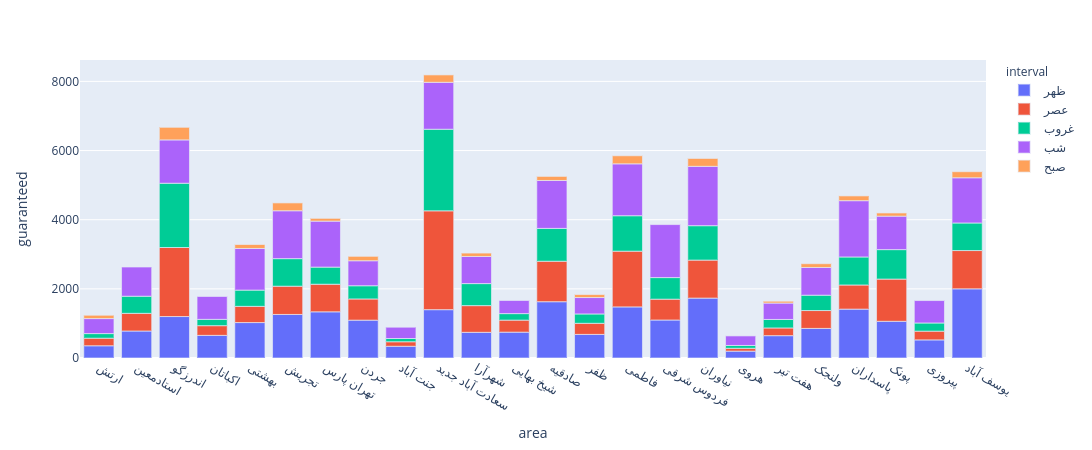

In [101]:
fig = px.bar(per_area, x='area', y='guaranteed', color='interval')
fig.update_xaxes(categoryorder='category ascending')
fig.show()